Insurance Claims- Fraud Detection

Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 

In [492]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings('ignore')

In [493]:
#importing data from github file and converting into a DataFrame 
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [494]:
#displaying all the columns in the dataset
pd. set_option("display.max_columns", None)

#displaying all the rows in the dataset
pd.set_option("display.max_rows",None)

In [495]:
data.head()


months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [496]:
data.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
995    22-02-2015  Single Vehicle Collision  Front Collision   
996    24-01-2015  Single Vehicle Collision   Rear Collision   
997    23-01-2015   Multi-vehicle Collision   Side Collision   
998    26-02-2015  Single Vehicle Collision   Rear Collision   
999    26-02-2015                Parked Car                ?   

    incident_severity authorities_contacted incident_state incident_city  \
995      Minor Damage                  Fire             NC    Northbrook   
996      Major Damage                  Fire             SC     Northbend   
997      Minor Damage                Police             NC     Arlington   
998      Major Damage                 Other             NY     Arlington   
999      Minor Damage                Police             WV      Columbus   

       incident_location  incident_hour_of_the_day  \
995   6045 Andromedia St                        20   
996     3092 Texas Drive                        23   
997          7629 5th St                         4   
998        6128 Elm Lane                         2   
999  1416 Cherokee Ridge                         6   

     number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
995                            1             YES                0          1   
996                            1             YES                2          3   
997                            3               ?                2          3   
998                            1               ?                0          1   
999                            1               ?                0          3   

    police_report_available  total_claim_amount  injury_claim  property_claim  \
995                       ?               87200         17440            8720   
996                       ?              108480         18080           18080   
997                     YES               67500          7500            7500   
998                     YES               46980          5220            5220   
999                       ?                5060           460             920   

     vehicle_claim   auto_make auto_model  auto_year fraud_r

Initial observations

1.The dataset has 40 columns

2.this dataset is consist of columns having both numerical and catagorical values.

3.Some of the columns in the dataset have object values.

4.Based on the different features we have to predict the fraud_reported 


# Exploratory Data Analysis(EDA)

In [497]:
#finding number of rows and columns
data.shape

(1000, 40)

The dataset has 1000 rows and 39 columns

In [498]:
#finding the null values in each column
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

_c39 column has only null values , so we can delete that column.


In [499]:
#deleting _c39 from the dataset
data=data.drop(['_c39'],axis=1)

In [500]:
#checking whether the column has been deleted or not
data.shape

(1000, 39)

In [501]:
#finding the null values in each column
data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

All null values are removed. lets recheck this by plotting a heatmap plot

<AxesSubplot:>

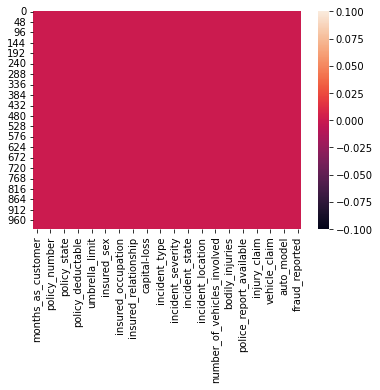

In [502]:
#checking for null values using a heatmap
sns.heatmap(data.isna())

In [503]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

This dataset has 21 columns having object(string) datatype values. We need to encode them into numeric values for further analysis. 

In [504]:
#lets check all the column names
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [505]:
#understanding the data at high level i.e. checking the statistics of the data
data.describe()


months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

observations from the statistics of the data

1.The difference between the mean and standard deviation for all most of the features appears to be good except policy_number, incident_hour_of_the_day, number_of_vehicles_involved, bodily_injuries, witnesses, injury_claim where the difference does not appears to be adequate. In these cases the standard deviation is nearly 40 to 50% of the mean. Also in case of some features like umbrella_limit and capital the standard deviation is greater than the mean.

2.many features have a min value of Zero in their distribution.

3.The difference between all the quantiles appears to be good enough for most of the features. but in case of some features like policy_deductable, umbrella_limit, insured_zip, capital-loss the differnece does not appears to be adequate.

4.many columns have object data so only a limited number of columns are printed after using describe() method.

In [506]:
# lets check the number of unique values in each column
data.nunique().to_frame("Unique values")

Unique values
months_as_customer                     391
age                                     46
policy_number                         1000
policy_bind_date                       951
policy_state                             3
policy_csl                               3
policy_deductable                        3
policy_annual_premium                  991
umbrella_limit                          11
insured_zip                            995
insured_sex                              2
insured_education_level                  7
insured_occupation                      14
insured_hobbies                         20
insured_relationship                     6
capital-gains                          338
capital-loss                           354
incident_date                           60
incident_type                            4
collision_type                           4
incident_severity                        4
authorities_contacted                    5
incident_state                           7
incident_city                            7
incident_location                     1000
incident_hour_of_the_day                24
number_of_vehicles_involved              4
property_damage                          3
bodily_injuries                          3
witnesses                                4
police_report_available                  3
total_claim_amount                     763
injury_claim                           638
property_claim                         626
vehicle_claim                          726
auto_make                               14
auto_model                              39
auto_year                               21
fraud_reported                           2

We have found out the number of unique values in each column , now lets find out the type of catagorical values in each column for selecting the proper encoding technique.

Lets split the dataset into numerical and catagorical columns for better analysis


In [507]:
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [508]:
# now lets check for numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [509]:
len(numerical_col)

18

In [510]:
# lets check for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)



['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [511]:
len(categorical_col)

21

The dataset has 18 numerical and 21 catagorical columns.


Lets break the columns having dates in dd/mm/yy format into three different columns.

In [512]:
#breaking the column 'policy_bind_date' into three different columns having month and year.
data['policy_bind_date']=pd.to_datetime(data['policy_bind_date'])
data['policy_bind_date_year']=data['policy_bind_date'].dt.year
data['policy_bind_date_month']=data['policy_bind_date'].dt.month
data['policy_bind_date_day']=data['policy_bind_date'].dt.day



In [513]:
#lets drop the policy_bind_date column as we have already broke it into three different columns
data=data.drop(['policy_bind_date'],axis=1)
data.head()

months_as_customer  age  policy_number policy_state policy_csl  \
0                 328   48         521585           OH    250/500   
1                 228   42         342868           IN    250/500   
2                 134   29         687698           OH    100/300   
3                 256   41         227811           IL    250/500   
4                 228   44         367455           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex insured_education_level insured_occupation insured_hobbies  \
0        MALE                      MD       craft-repair        sleeping   
1        MALE                      MD  machine-op-inspct         reading   
2      FEMALE                     PhD              sales     board-games   
3      FEMALE                     PhD       armed-forces     board-games   
4        MALE               Associate              sales     board-games   

  insured_relationship  capital-gains  capital-loss incident_date  \
0              husband          53300             0    25-01-2015   
1       other-relative              0             0    21-01-2015   
2            own-child          35100             0    22-02-2015   
3            unmarried          48900        -62400    10-01-2015   
4            unmarried          66000        -46000    17-02-2015   

              incident_type   collision_type incident_severity  \
0  Single Vehicle Collision   Side Collision      Major Damage   
1             Vehicle Theft                ?      Minor Damage   
2   Multi-vehicle Collision   Rear Collision      Minor Damage   
3  Single Vehicle Collision  Front Collision      Major Damage   
4             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

   auto_year fraud_reported  policy_bind_date_year  policy

In [514]:
#breaking the column 'incident_date' into three different columns having month and year.
data['incident_date']=pd.to_datetime(data['incident_date'])
data['incident_date_year']=data['incident_date'].dt.year
data['incident_date_month']=data['incident_date'].dt.month
data['incident_date_day']=data['incident_date'].dt.day


In [515]:
#lets drop the incident_date column as we have already broke it into three different columns
data=data.drop(['incident_date'],axis=1)
data.head()

months_as_customer  age  policy_number policy_state policy_csl  \
0                 328   48         521585           OH    250/500   
1                 228   42         342868           IN    250/500   
2                 134   29         687698           OH    100/300   
3                 256   41         227811           IL    250/500   
4                 228   44         367455           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex insured_education_level insured_occupation insured_hobbies  \
0        MALE                      MD       craft-repair        sleeping   
1        MALE                      MD  machine-op-inspct         reading   
2      FEMALE                     PhD              sales     board-games   
3      FEMALE                     PhD       armed-forces     board-games   
4        MALE               Associate              sales     board-games   

  insured_relationship  capital-gains  capital-loss             incident_type  \
0              husband          53300             0  Single Vehicle Collision   
1       other-relative              0             0             Vehicle Theft   
2            own-child          35100             0   Multi-vehicle Collision   
3            unmarried          48900        -62400  Single Vehicle Collision   
4            unmarried          66000        -46000             Vehicle Theft   

    collision_type incident_severity authorities_contacted incident_state  \
0   Side Collision      Major Damage                Police             SC   
1                ?      Minor Damage                Police             VA   
2   Rear Collision      Minor Damage                Police             NY   
3  Front Collision      Major Damage                Police             OH   
4                ?      Minor Damage                  None             NY   

  incident_city  incident_location  incident_hour_of_the_day  \
0      Columbus     9935 4th Drive                         5   
1     Riverwood       6608 MLK Hwy                         8   
2      Columbus  7121 Francis Lane                         7   
3     Arlington   6956 Maple Drive                         5   
4     Arlington       3041 3rd Ave                        20   

   number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
0                            1             YES                1          2   
1                            1               ?                0          0   
2                            3              NO                2          3   
3                            1               ?                1          2   
4                            1              NO                0          1   

  police_report_available  total_claim_amount  injury_claim  property_claim  \
0                     YES               71610          6510           13020   
1                       ?                5070           780             780   
2                      NO               34650          7700            3850   
3                      NO               63400          6340            6340   
4                      NO                6500          1300             650   

   vehicle_claim  auto_make auto_model  auto_year fraud_reported  \
0          52080       Saab        92x       2004              Y   
1           3510   Mercedes       E400       2007              Y   
2          23100      Dodge        RAM       2007              N   
3          50720  Chevrolet      Tahoe       2014              Y   
4           4550     Accura        RSX       2009      

In [516]:
data.shape

(1000, 43)

In [517]:
#Lets delete the incident location column from the dataset.
data=data.drop(['incident_location'],axis=1)

In [518]:
# now lets check for numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_bind_date_year', 'policy_bind_date_month', 'policy_bind_date_day', 'incident_date_year', 'incident_date_month', 'incident_date_day']


In [519]:
len(numerical_col)

24

In [520]:
# lets check for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [521]:
len(categorical_col)

18

In [522]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [523]:
# lets again check the number of unique values in each column
data.nunique().to_frame("Unique values")

Unique values
months_as_customer                     391
age                                     46
policy_number                         1000
policy_state                             3
policy_csl                               3
policy_deductable                        3
policy_annual_premium                  991
umbrella_limit                          11
insured_zip                            995
insured_sex                              2
insured_education_level                  7
insured_occupation                      14
insured_hobbies                         20
insured_relationship                     6
capital-gains                          338
capital-loss                           354
incident_type                            4
collision_type                           4
incident_severity                        4
authorities_contacted                    5
incident_state                           7
incident_city                            7
incident_hour_of_the_day                24
number_of_vehicles_involved              4
property_damage                          3
bodily_injuries                          3
witnesses                                4
police_report_available                  3
total_claim_amount                     763
injury_claim                           638
property_claim                         626
vehicle_claim                          726
auto_make                               14
auto_model                              39
auto_year                               21
fraud_reported                           2
policy_bind_date_year                   26
policy_bind_date_month                  12
policy_bind_date_day                    31
incident_date_year                       1
incident_date_month                     12
incident_date_day                       22

In [524]:
# lets check the value counts of each type in each catagorical column
for d in data[categorical_col].columns:
        print(data[d].value_counts())
        print('-'*200)

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
------------------

For a better understanding lets plot the count plot for columns having catagorical values.

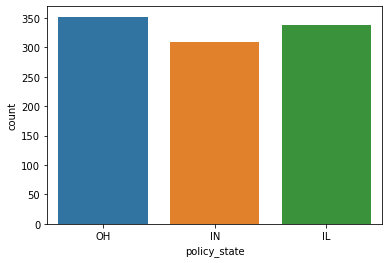

In [525]:
#lets plot the value counts for policy_state
sns.countplot(x='policy_state', data=data, )
plt.show()

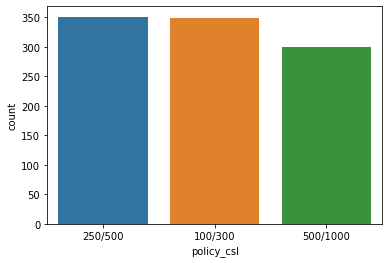

In [526]:
#lets plot the value counts for policy_csl
sns.countplot(x='policy_csl', data=data, )
plt.show()

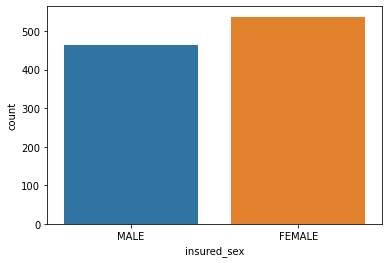

In [527]:
#lets plot the value counts for insured_sex
sns.countplot(x='insured_sex', data=data, )
plt.show()

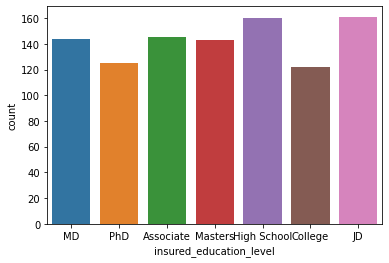

In [528]:
#lets plot the value counts for insured_education_level
sns.countplot(x='insured_education_level', data=data, )
plt.show()

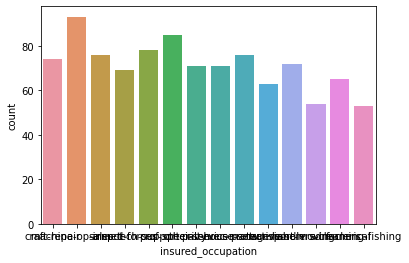

In [529]:
#lets plot the value counts for insured_occupation
sns.countplot(x='insured_occupation', data=data, )
plt.show()

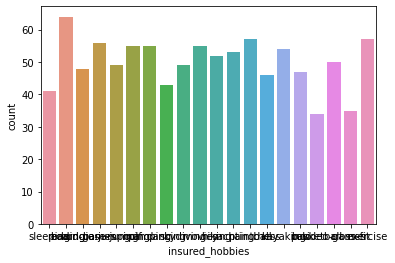

In [530]:
#lets plot the value counts for insured_hobbies
sns.countplot(x='insured_hobbies', data=data, )
plt.show()

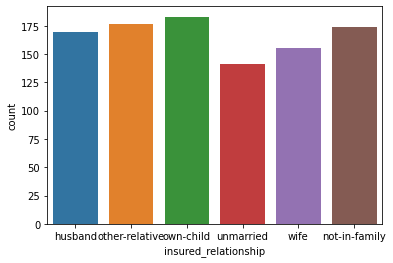

In [531]:
#lets plot the value counts for insured_relationship
sns.countplot(x='insured_relationship', data=data, )
plt.show()

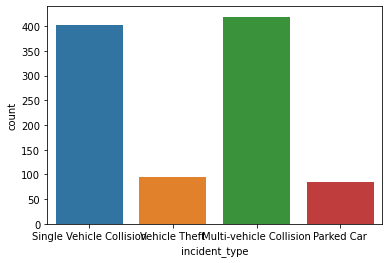

In [532]:
#lets plot the value counts for incident_type
sns.countplot(x='incident_type', data=data, )
plt.show()

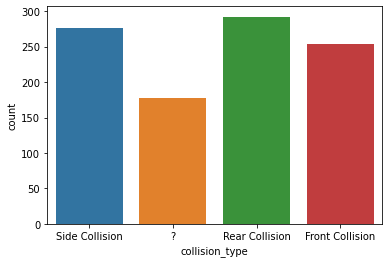

In [533]:
#lets plot the value counts for collision_type
sns.countplot(x='collision_type', data=data, )
plt.show()

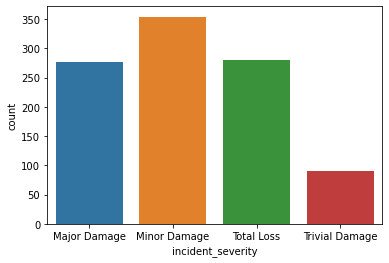

In [534]:
#lets plot the value counts for incident_severity
sns.countplot(x='incident_severity', data=data, )
plt.show()

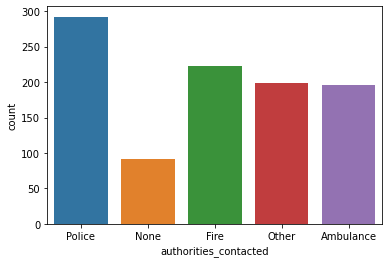

In [535]:
#lets plot the value counts for authorities_contacted
sns.countplot(x='authorities_contacted', data=data, )
plt.show()

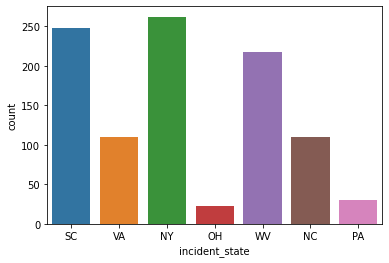

In [536]:
#lets plot the value counts for incident_state
sns.countplot(x='incident_state', data=data, )
plt.show()

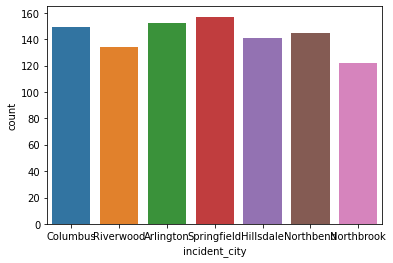

In [537]:
#lets plot the value counts for incident_city
sns.countplot(x='incident_city', data=data, )
plt.show()

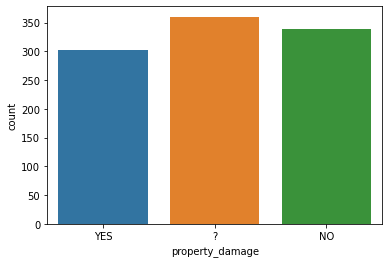

In [538]:
#lets plot the value counts for property_damage
sns.countplot(x='property_damage', data=data, )
plt.show()

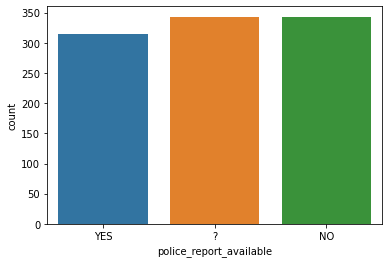

In [539]:
#lets plot the value counts for police_report_available
sns.countplot(x='police_report_available', data=data, )
plt.show()

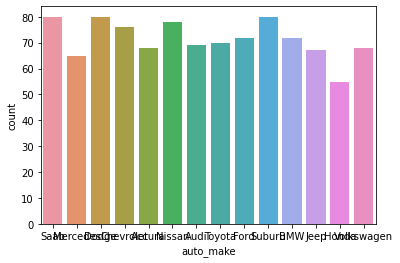

In [540]:
#lets plot the value counts for auto_make
sns.countplot(x='auto_make', data=data, )
plt.show()

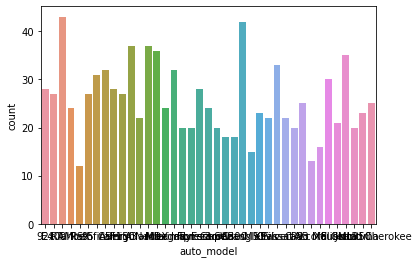

In [541]:
#lets plot the value counts for auto_model
sns.countplot(x='auto_model', data=data, )
plt.show()

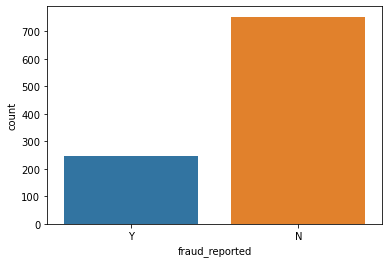

In [542]:
#lets plot the value counts for fraud_reported
sns.countplot(x='fraud_reported', data=data, )
plt.show()

Observations from the count plots

1.Most of the policies are from OH state

2.Female are mostly injured in the accidents.

3.Most of the people who are insured have completed school.

4.Most of the people who are insured have an occupation of machine-op-inspct.

5.Most of the insured people have reading hobbie.

6.Most of the cases were related to Multi-vehicle Collision.

7.Most of the collision type were rear collision.

8.In most of the cases Minor Damage happened after collision.

9.Policewere contacted the most after accidents.

10.Most of the incidents were reported from Springfield city.

11.753 times fraud reported after accidents.


In [543]:
print("number of catagorical columns are ", len(categorical_col))

number of catagorical columns are  18


Lets Encode the Catagorical columns with Object(string) values with LabelEncoder encoding technique.


In [544]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [545]:
#encoding the catagorical columns.
data[categorical_col]=data[categorical_col].apply(lab_enc.fit_transform)
data[categorical_col]



policy_state  policy_csl  insured_sex  insured_education_level  \
0               2           1            1                        4   
1               1           1            1                        4   
2               2           0            0                        6   
3               0           1            0                        6   
4               0           2            1                        0   
5               2           1            0                        6   
6               1           1            1                        6   
7               0           0            1                        0   
8               0           0            0                        6   
9               0           0            1                        6   
10              2           0            0                        5   
11              2           0            0                        2   
12              2           2            1                        4   
13              2           0            0                        4   
14              2           1            0                        1   
15              1           0            0                        4   
16              2           2            1                        1   
17              1           2            1                        2   
18              2           2            0                        4   
19              1           2            0                        2   
20              1           1            1                        3   
21              0           2            0                        0   
22              0           0            1                        2   
23              1           0            1                        4   
24              1           0            1                        1   
25              2           0            1                        5   
26              1           0            1                        2   
27              1           0            1                        3   
28              2           0            0                        3   
29              0           2            0                        6   
30              0           1            1                        5   
31              0           0            1                        3   
32              0           2            0                        0   
33              0           0            1                        2   
34              0           2            1                        6   
35              2           0            1                        2   
36              0           0            0                        5   
37              0           2            0                        3   
38              1           2            0                        4   
39              1           1            1                        3   
40              0           0            1                        0   
41              1           1            1                        0   
42              0           2            0                        1   
43              2           1            0                        6   
44              0           0            1                        3   
45              0           1            0                        4   
46              1           0            0                        0   
47              2           2            1                        1   
48              1           2            0                        6   
49              0           0            0                        5   
50              2           1            1                        4   
51              0           0            0                        3   
52              1           0            1                        1   
53              1           0            0                        3   
54              2           1            1                        6   
55              2           0

In [546]:
data.shape

(1000, 42)

In [547]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   int32  
 4   policy_csl                   1000 non-null   int32  
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int32  
 11  insured_occupation           1000 non-null   int32  
 12  insured_hobbies              1000 non-null   int32  
 13  insured_relationshi

As we know that there are 42 columns in the dataset and all of them may not be relevent in our analysis, so lets reduce the number of columns using SelectKBest feature selection technique.

# SelectKBest feature selection method

In [548]:
from sklearn.feature_selection import SelectKBest, f_classif

In [549]:
y=data.fraud_reported
x=data.drop(columns=['fraud_reported'])

In [550]:
best_features=SelectKBest(score_func=f_classif,k=17)
fit=best_features.fit(x,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(x.columns)

#concatinating dataframes
feature_scores=pd.concat([data_columns,data_scores],axis=1)
feature_scores.columns=['Feature_name','Scores']
print(feature_scores.nlargest(17, 'Scores'))

                   Feature_name      Scores
18            incident_severity  196.960603
31                vehicle_claim   29.718214
28           total_claim_amount   27.463776
30               property_claim   19.327729
17               collision_type   12.252860
29                 injury_claim    8.328776
37         policy_bind_date_day    3.683713
7                umbrella_limit    3.441452
23  number_of_vehicles_involved    2.689100
20               incident_state    2.644427
16                incident_type    2.539153
26                    witnesses    2.451026
12              insured_hobbies    2.194239
19        authorities_contacted    2.098018
40            incident_date_day    1.949219
21                incident_city    1.631761
4                    policy_csl    1.382236


lets build a new dtaframe to store all the best 17 features

In [551]:
new_data=data[['incident_severity','vehicle_claim','total_claim_amount','property_claim','collision_type','injury_claim','policy_bind_date_day','umbrella_limit','number_of_vehicles_involved','incident_state','incident_type','witnesses','insured_hobbies','authorities_contacted','incident_date_day','incident_city','policy_csl','fraud_reported']]

In [552]:
new_data.shape[1]

18

In [553]:
new_data.head()

incident_severity  vehicle_claim  total_claim_amount  property_claim  \
0                  0          52080               71610           13020   
1                  1           3510                5070             780   
2                  1          23100               34650            3850   
3                  0          50720               63400            6340   
4                  1           4550                6500             650   

   collision_type  injury_claim  policy_bind_date_day  umbrella_limit  \
0               3          6510                    17               0   
1               0           780                    27         5000000   
2               2          7700                     9         5000000   
3               1          6340                    25         6000000   
4               0          1300                     6         6000000   

   number_of_vehicles_involved  incident_state  incident_type  witnesses  \
0                            1               4              2          2   
1                            1               5              3          0   
2                            3               1              0          3   
3                            1               2              2          2   
4                            1               1              3          1   

   insured_hobbies  authorities_contacted  incident_date_day  incident_city  \
0               17                      4                 25              1   
1               15                      4                 21              5   
2                2                      4                 22              1   
3                2                      4                  1              0   
4                2                      2                 17              0   

   policy_csl  fraud_reported  
0           1               1  
1           1               1  
2           0               0  
3           1               1  
4           2               0

All the object datatype columns are encoded with numerical values now. So lets find out the typre of distribution of each feature.

In [554]:
# now lets check for numerical columns
numerical_col=[]
for i in new_data.dtypes.index:
    if new_data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['incident_severity', 'vehicle_claim', 'total_claim_amount', 'property_claim', 'collision_type', 'injury_claim', 'policy_bind_date_day', 'umbrella_limit', 'number_of_vehicles_involved', 'incident_state', 'incident_type', 'witnesses', 'insured_hobbies', 'authorities_contacted', 'incident_date_day', 'incident_city', 'policy_csl', 'fraud_reported']


In [555]:
len(numerical_col)

18

In [556]:
# lets check for categorical columns
categorical_col=[]
for i in new_data.dtypes.index:
    if new_data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)



[]


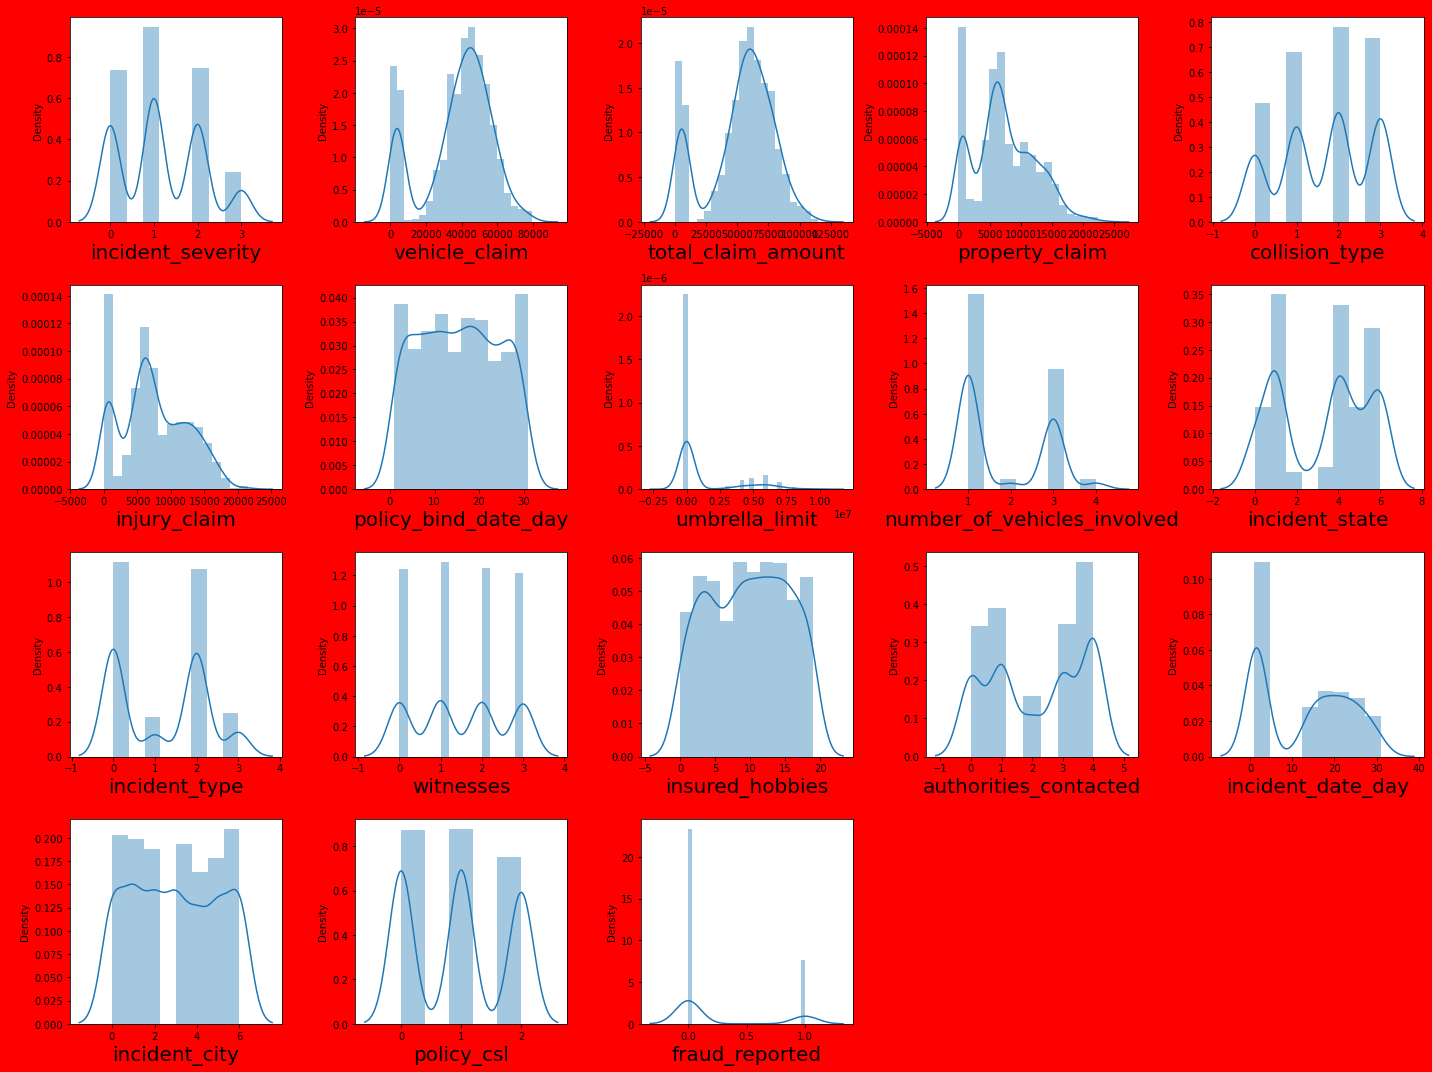

In [557]:
# now the data looks good and there is no missing values and Object values so we can start visualizing the type of distribution for each feature
# we will only evaluate the type of distribution for features having continious data here

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in new_data:
    if plotnumber<=20:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(new_data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

Observations from the distplot.

1.Vechile_claim, totalamount_claim shows normal distibution.

2.Insured hobbies does not show normal distribution.

3.we observed skewness in Property claim and injury_claim.

4.now lets check whether they have outliers in the distribution by plotting box plots.

In [558]:
#checking for outliers in all the features
df_features=new_data.drop('fraud_reported', axis=1)

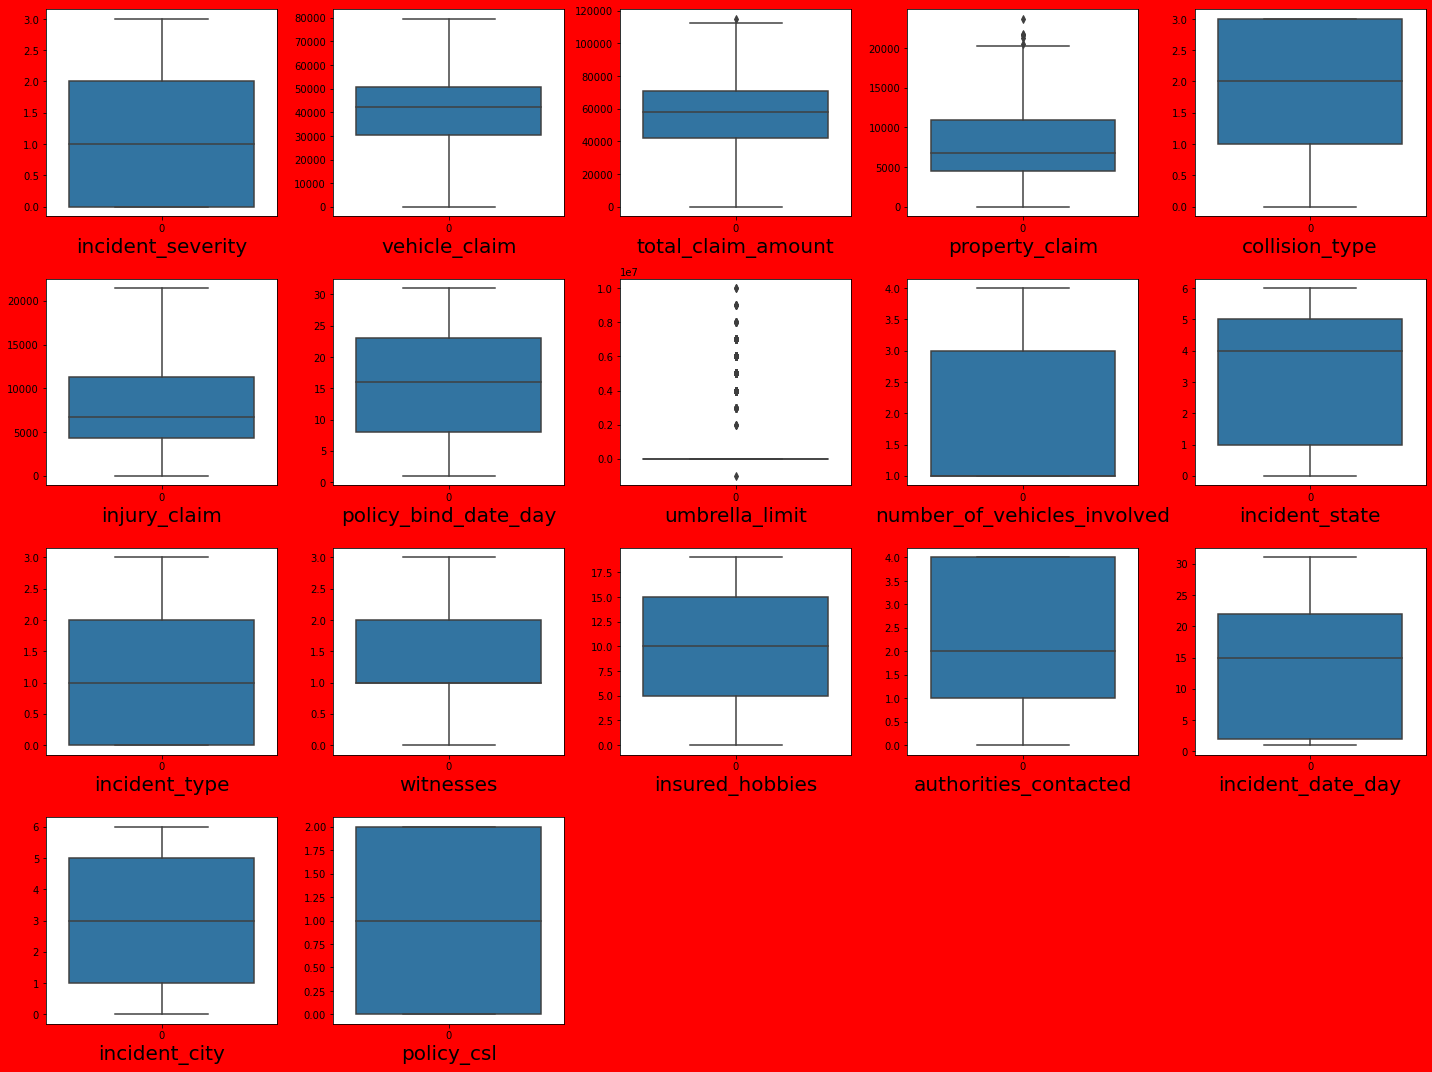

In [559]:
# checking for the outliers by ploting box plots

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df_features:
    if plotnumber<=19:
        plt.subplot(4,5,plotnumber)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

observations from the box plot

1.Total_claim_amount  and Property_claim columns have outliers.
2.umbrella_limit has also outliers But as this is a catagorical columns we dont have to worry about the outliers.

Lets remove the outliers by finding out the IQR.

In [560]:
df=new_data

In [561]:
#Finding the IQR(Inter Quantile range) to finding the outliers

#1st quantile
q1=df.quantile(0.25)
#3rd quantile
q3=df.quantile(0.75)

#IQR
iqr=q3 -q1

iqr

incident_severity                  2.0
vehicle_claim                  20530.0
total_claim_amount             28780.0
property_claim                  6440.0
collision_type                     2.0
injury_claim                    7010.0
policy_bind_date_day              15.0
umbrella_limit                     0.0
number_of_vehicles_involved        2.0
incident_state                     4.0
incident_type                      2.0
witnesses                          1.0
insured_hobbies                   10.0
authorities_contacted              3.0
incident_date_day                 20.0
incident_city                      4.0
policy_csl                         2.0
fraud_reported                     0.0
dtype: float64

In [562]:
#removing the outliers for total_claim_amount
tca_high=q3.total_claim_amount + (1.5 * iqr.total_claim_amount)


index=np.where(df['total_claim_amount'] > tca_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(999, 18)


index  incident_severity  vehicle_claim  total_claim_amount  \
0        0                  0          52080               71610   
1        1                  1           3510                5070   
2        2                  1          23100               34650   
3        3                  0          50720               63400   
4        4                  1           4550                6500   
5        5                  0          51280               64100   
6        6                  1          50050               78650   
7        7                  2          32830               51590   
8        8                  2          22160               27700   
9        9                  2          32900               42300   
10      10                  2          63280               87010   
11      12                  2          42390               56520   
12      13                  1           5040                7280   
13      14                  2          33600               46200   
14      15                  0          42080               63120   
15      16                  0          40530               52110   
16      17                  2          56640               77880   
17      18                  2          53040               72930   
18      19                  0          48320               60400   
19      20                  1          41920               47160   
20      21                  2          33110               37840   
21      22                  0          47680               71520   
22      23                  2          73620               98160   
23      24                  1          56640               77880   
24      25                  0          44000               71500   
25      26                  1           6560                9020   
26      27                  1           4160                5720   
27      28                  1          46560               69840   
28      29                  1          63450               91650   
29      30                  0          50400               75600   
30      31                  0          52220               67140   
31      32                  2          23170               29790   
32      33                  0          49070               77110   
33      34                  2          48600               64800   
34      35                  0          37170               53100   
35      36                  2          48160               60200   
36      37                  1           3280                5330   
37      38                  0          43610               62300   
38      39                  0          38290               60170   
39      40                  1          28000               40000   
40      41                  0          64720               97080   
41      42                  1          40180               51660   
42      43                  2          39760               51120   
43      44                  1          33840               56400   
44      45                  2          48230               55120   
45      46                  2          63090               77110   
46      47                  0          50240               62800   
47      48                  3           5670                7290   
48      49                  2          53620               76600   
49      50                  1          57260               81800   
50      51                  3           5280                7260   
51      52                  1           3440                4300   
52      53                  0          44870               70510   
53      54                  1           1680                2640   
54      55                  1          55230               78900   
55      56                  0          50160               56430   
56      57                  1           1800                2400   
57      58                  2          51170               65

In [563]:
#removing the outliers for property_claim
pc_high=q3.property_claim + (1.5 * iqr.property_claim)


index=np.where(df['property_claim'] > pc_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(993, 18)


index  incident_severity  vehicle_claim  total_claim_amount  \
0        0                  0          52080               71610   
1        1                  1           3510                5070   
2        2                  1          23100               34650   
3        3                  0          50720               63400   
4        4                  1           4550                6500   
5        5                  0          51280               64100   
6        6                  1          50050               78650   
7        7                  2          32830               51590   
8        8                  2          22160               27700   
9        9                  2          32900               42300   
10      10                  2          63280               87010   
11      12                  2          42390               56520   
12      13                  1           5040                7280   
13      14                  2          33600               46200   
14      15                  0          42080               63120   
15      16                  0          40530               52110   
16      17                  2          56640               77880   
17      18                  2          53040               72930   
18      19                  0          48320               60400   
19      20                  1          41920               47160   
20      21                  2          33110               37840   
21      22                  0          47680               71520   
22      23                  2          73620               98160   
23      24                  1          56640               77880   
24      25                  0          44000               71500   
25      26                  1           6560                9020   
26      27                  1           4160                5720   
27      28                  1          46560               69840   
28      29                  1          63450               91650   
29      30                  0          50400               75600   
30      31                  0          52220               67140   
31      32                  2          23170               29790   
32      33                  0          49070               77110   
33      34                  2          48600               64800   
34      35                  0          37170               53100   
35      36                  2          48160               60200   
36      37                  1           3280                5330   
37      38                  0          43610               62300   
38      39                  0          38290               60170   
39      40                  1          28000               40000   
40      41                  0          64720               97080   
41      42                  1          40180               51660   
42      43                  2          39760               51120   
43      44                  1          33840               56400   
44      45                  2          48230               55120   
45      46                  2          63090               77110   
46      47                  0          50240               62800   
47      48                  3           5670                7290   
48      49                  2          53620               76600   
49      50                  1          57260               81800   
50      51                  3           5280                7260   
51      52                  1           3440                4300   
52      53                  0          44870               70510   
53      54                  1           1680                2640   
54      55                  1          55230               78900   
55      56                  0          50160               56430   
56      57                  1           1800                2400   
57      58                  2          51170               65

In [564]:
new_data=df

In [565]:
new_data.shape

(993, 18)

In [566]:
#Lets plot some more graphs to have a better understanding of the data 
#correlation between the features and labels

y=new_data['fraud_reported']
x=new_data.drop(columns=['fraud_reported'])

In [567]:
x

incident_severity  vehicle_claim  total_claim_amount  property_claim  \
0                    0          52080               71610           13020   
1                    1           3510                5070             780   
2                    1          23100               34650            3850   
3                    0          50720               63400            6340   
4                    1           4550                6500             650   
5                    0          51280               64100            6410   
6                    1          50050               78650            7150   
7                    2          32830               51590            9380   
8                    2          22160               27700            2770   
9                    2          32900               42300            4700   
10                   2          63280               87010           15820   
12                   2          42390               56520            9420   
13                   1           5040                7280            1120   
14                   2          33600               46200            8400   
15                   0          42080               63120           10520   
16                   0          40530               52110            5790   
17                   2          56640               77880            7080   
18                   2          53040               72930           13260   
19                   0          48320               60400            6040   
20                   1          41920               47160            5240   
21                   2          33110               37840            4730   
22                   0          47680               71520            5960   
23                   2          73620               98160           16360   
24                   1          56640               77880           14160   
25                   0          44000               71500           11000   
26                   1           6560                9020             820   
27                   1           4160                5720             520   
28                   1          46560               69840           15520   
29                   1          63450               91650           14100   
30                   0          50400               75600           12600   
31                   0          52220               67140            7460   
32                   2          23170               29790            3310   
33                   0          49070               77110           14020   
34                   2          48600               64800            5400   
35                   0          37170               53100            5310   
36                   2          48160               60200            6020   
37                   1           3280                5330             820   
38                   0          43610               62300            6230   
39                   0          38290               60170           10940   
40                   1          28000               40000            4000   
41                   0          64720               97080           16180   
42                   1          40180               51660            5740   
43                   2          39760               51120            5680   
44                   1          33840               56400           11280   
45                   2          48230               55120               0   
46                   2          63090               77110           14020   
47                   0          50240               62800            6280   
48                   3           5670                7290             810   
49                   2          53620               76600            7660   
50                   1          57260               81800            8180   
51                   3           5280                7260             660   
5

In [568]:
y

0      1
1      1
2      0
3      1
4      0
5      1
6      0
7      0
8      0
9      0
10     0
12     0
13     0
14     1
15     1
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     0
25     1
26     0
27     1
28     0
29     0
30     0
31     1
32     0
33     0
34     0
35     1
36     1
37     0
38     0
39     1
40     0
41     1
42     0
43     0
44     0
45     0
46     0
47     1
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     1
61     0
62     0
63     1
64     1
65     1
66     1
67     0
68     0
69     0
70     1
71     1
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     1
80     0
81     0
82     0
83     0
84     1
85     0
86     0
87     0
88     0
89     1
90     0
91     1
92     0
93     0
94     0
95     0
96     1
97     1
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    0
108    1
109    1
110    0
111    1
1

In [569]:
#finding the corelation between the features in the data set
new_data.corr()

incident_severity  vehicle_claim  \
incident_severity                     1.000000      -0.360038   
vehicle_claim                        -0.360038       1.000000   
total_claim_amount                   -0.363181       0.983012   
property_claim                       -0.299260       0.736509   
collision_type                       -0.308293       0.601951   
injury_claim                         -0.276740       0.721414   
policy_bind_date_day                 -0.042348      -0.009221   
umbrella_limit                        0.005411      -0.037353   
number_of_vehicles_involved          -0.171210       0.269773   
incident_state                        0.063995      -0.054082   
incident_type                         0.161084      -0.272268   
witnesses                            -0.014616      -0.023327   
insured_hobbies                      -0.018950      -0.027227   
authorities_contacted                 0.162598      -0.171098   
incident_date_day                     0.016989      -0.057056   
incident_city                        -0.018938       0.032909   
policy_csl                            0.025904      -0.048219   
fraud_reported                       -0.405786       0.170154   

                             total_claim_amount  property_claim  \
incident_severity                     -0.363181       -0.299260   
vehicle_claim                          0.983012        0.736509   
total_claim_amount                     1.000000        0.812827   
property_claim                         0.812827        1.000000   
collision_type                         0.597494        0.466069   
injury_claim                           0.804932        0.568729   
policy_bind_date_day                  -0.006191       -0.009022   
umbrella_limit                        -0.039178       -0.021285   
number_of_vehicles_involved            0.274813        0.224666   
incident_state                        -0.048223       -0.034989   
incident_type                         -0.276977       -0.224253   
witnesses                             -0.011764        0.055340   
insured_hobbies                       -0.018100       -0.014092   
authorities_contacted                 -0.172305       -0.127383   
incident_date_day                     -0.050972       -0.023394   
incident_city                          0.038146        0.039113   
policy_csl                            -0.057781       -0.050400   
fraud_reported                         0.164466        0.140194   

                             collision_type  injury_claim  \
incident_severity                 -0.308293     -0.276740   
vehicle_claim                      0.601951      0.721414   
total_claim_amount                 0.597494      0.804932   
property_claim                     0.466069      0.568729   
collision_type                     1.000000      0.443419   
injury_claim                       0.443419      1.000000   
policy_bind_date_day               0.011321      0.010966   
umbrella_limit                    -0.027706     -0.046188   
number_of_vehicles_involved        0.331262      0.221396   
incident_state                    -0.024095     -0.017087   
incident_type                     -0.323509     -0.223811   
witnesses                         -0.040181     -0.026582   
insured_hobbies                   -0.009919      0.021260   
authorities_contacted             -0.139542     -0.144262   
incident_date_day                  0.002591     -0.031570   
incident_city                      0.024827      0.040613   
policy_csl                        -0.037443     -0.076331   
fraud_reported                     0.112787      0.093363   

                             policy_bind_date_day  umbrella_limit  \
incident_severity                       -0.042348        0.005411   
vehicle_claim                           -0.009221       -0.037353   
total_claim_amount                      -0.006191       -0.039178   
property_claim                          -0.009022       -0.021285   
collision_type

In [570]:
#sorting the correlation values of fraud_reported with all the columns
new_data.corr()['fraud_reported'].sort_values()

incident_severity             -0.405786
incident_type                 -0.055489
incident_state                -0.054120
insured_hobbies               -0.048870
incident_date_day             -0.047811
policy_csl                    -0.042618
authorities_contacted         -0.040383
incident_city                 -0.033055
witnesses                      0.053784
number_of_vehicles_involved    0.056681
umbrella_limit                 0.060534
policy_bind_date_day           0.063964
injury_claim                   0.093363
collision_type                 0.112787
property_claim                 0.140194
total_claim_amount             0.164466
vehicle_claim                  0.170154
fraud_reported                 1.000000
Name: fraud_reported, dtype: float64

We can observe that no feature is strongly corelated with the label.To get a more clear view lets plot the heatmap

<AxesSubplot:>

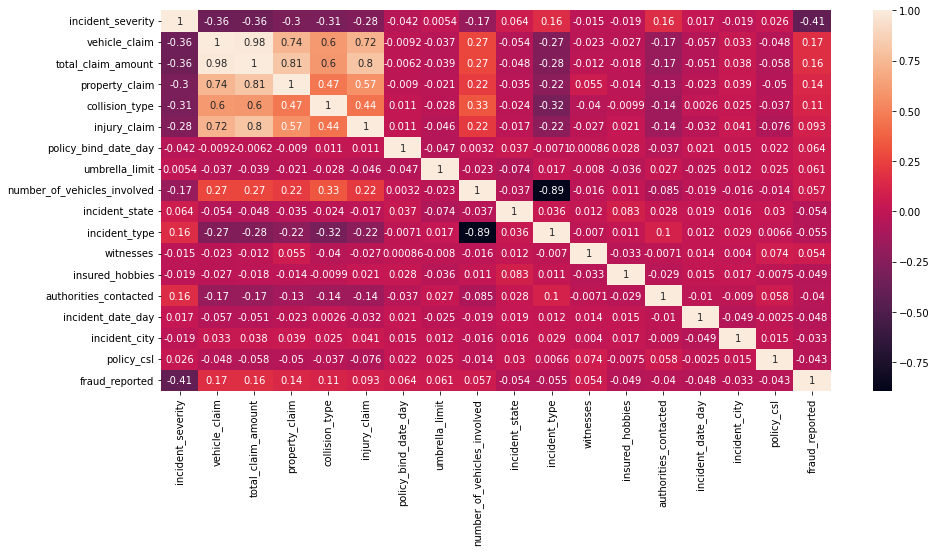

In [571]:
#now lets find out the co relation among the features(multicolinearity) using heatmap plot.
plt.figure(figsize=(15,7))
sns.heatmap(new_data.corr(),annot=True)

observations from the heatmap

1.Vechile_claim is hidhly corelated with total_claim_amount, property_claim and injury_claim

2.Total_claim_amount is highly corelated with property_claim and injury_claim

Lets plot regplots plots among the above features and analyze the trend.

In [572]:
new_data.head()

incident_severity  vehicle_claim  total_claim_amount  property_claim  \
0                  0          52080               71610           13020   
1                  1           3510                5070             780   
2                  1          23100               34650            3850   
3                  0          50720               63400            6340   
4                  1           4550                6500             650   

   collision_type  injury_claim  policy_bind_date_day  umbrella_limit  \
0               3          6510                    17               0   
1               0           780                    27         5000000   
2               2          7700                     9         5000000   
3               1          6340                    25         6000000   
4               0          1300                     6         6000000   

   number_of_vehicles_involved  incident_state  incident_type  witnesses  \
0                            1               4              2          2   
1                            1               5              3          0   
2                            3               1              0          3   
3                            1               2              2          2   
4                            1               1              3          1   

   insured_hobbies  authorities_contacted  incident_date_day  incident_city  \
0               17                      4                 25              1   
1               15                      4                 21              5   
2                2                      4                 22              1   
3                2                      4                  1              0   
4                2                      2                 17              0   

   policy_csl  fraud_reported  
0           1               1  
1           1               1  
2           0               0  
3           1               1  
4           2               0

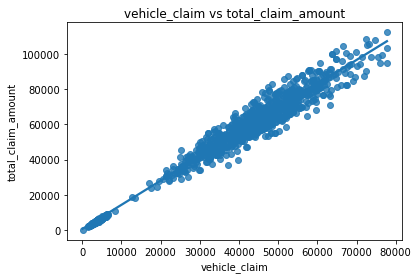

In [573]:
sns.regplot(new_data.vehicle_claim, new_data.total_claim_amount)
plt.xlabel('vehicle_claim')
plt.ylabel('total_claim_amount')
plt.title('vehicle_claim vs total_claim_amount')
plt.show()

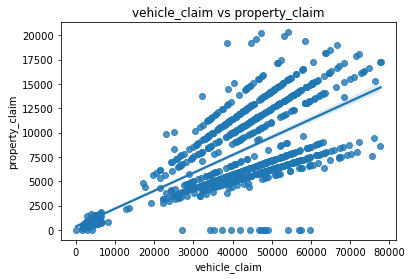

In [574]:
sns.regplot(new_data.vehicle_claim, new_data.property_claim)
plt.xlabel('vehicle_claim')
plt.ylabel('property_claim')
plt.title('vehicle_claim vs property_claim')
plt.show()

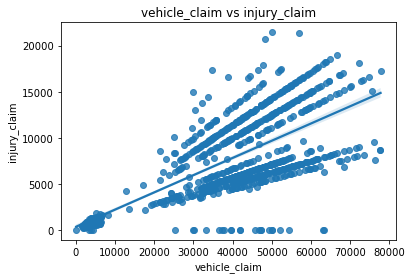

In [575]:
sns.regplot(new_data.vehicle_claim, new_data.injury_claim)
plt.xlabel('vehicle_claim')
plt.ylabel('injury_claim')
plt.title('vehicle_claim vs injury_claim')
plt.show()

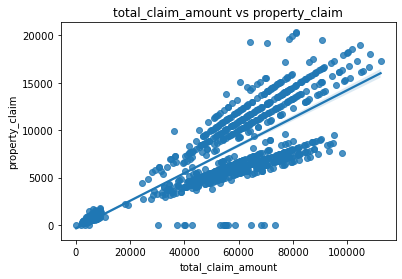

In [576]:
sns.regplot(new_data.total_claim_amount, new_data.property_claim)
plt.xlabel('total_claim_amount')
plt.ylabel('property_claim')
plt.title('total_claim_amount vs property_claim')
plt.show()

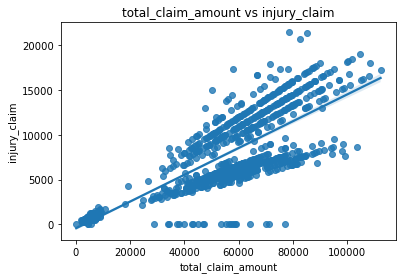

In [577]:
sns.regplot(new_data.total_claim_amount, new_data.injury_claim)
plt.xlabel('total_claim_amount')
plt.ylabel('injury_claim')
plt.title('total_claim_amount vs injury_claim')
plt.show()

After analysing the regplots I have decided to delete the total_claim_amount and vechile claim from the dataset to remove multicolinearity.

In [578]:
new_data=new_data.drop('total_claim_amount', axis=1)


In [580]:
new_data=new_data.drop('vehicle_claim', axis=1)

<AxesSubplot:>

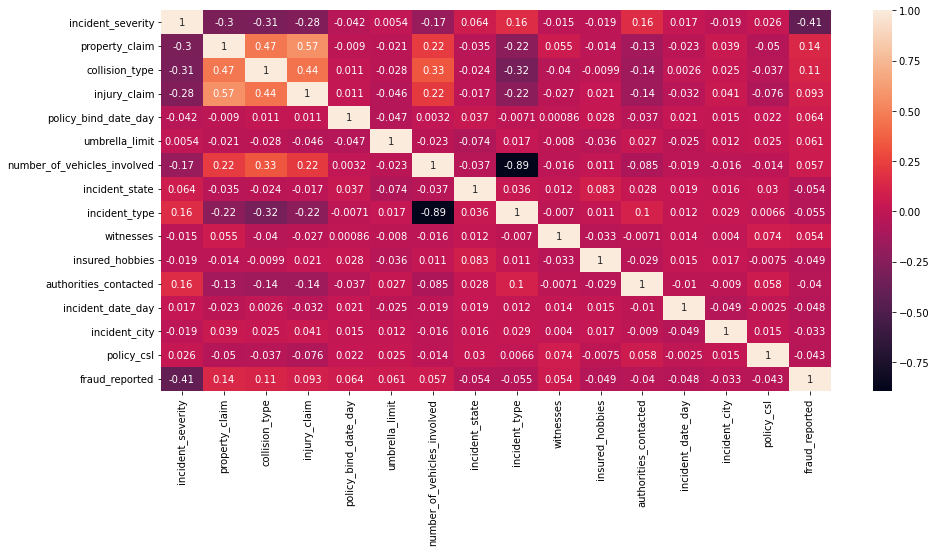

In [581]:

plt.figure(figsize=(15,7))
sns.heatmap(new_data.corr(),annot=True)

Multicolinearity is removed

Lets plot some more graphs to understand more about the data


In [582]:
y=new_data['fraud_reported']
x=new_data.drop(columns=['fraud_reported'])

In [583]:
x.head()

incident_severity  property_claim  collision_type  injury_claim  \
0                  0           13020               3          6510   
1                  1             780               0           780   
2                  1            3850               2          7700   
3                  0            6340               1          6340   
4                  1             650               0          1300   

   policy_bind_date_day  umbrella_limit  number_of_vehicles_involved  \
0                    17               0                            1   
1                    27         5000000                            1   
2                     9         5000000                            3   
3                    25         6000000                            1   
4                     6         6000000                            1   

   incident_state  incident_type  witnesses  insured_hobbies  \
0               4              2          2               17   
1               5              3          0               15   
2               1              0          3                2   
3               2              2          2                2   
4               1              3          1                2   

   authorities_contacted  incident_date_day  incident_city  policy_csl  
0                      4                 25              1           1  
1                      4                 21              5           1  
2                      4                 22              1           0  
3                      4                  1              0           1  
4                      2                 17              0           2

In [584]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

In [585]:
x.shape

(993, 15)

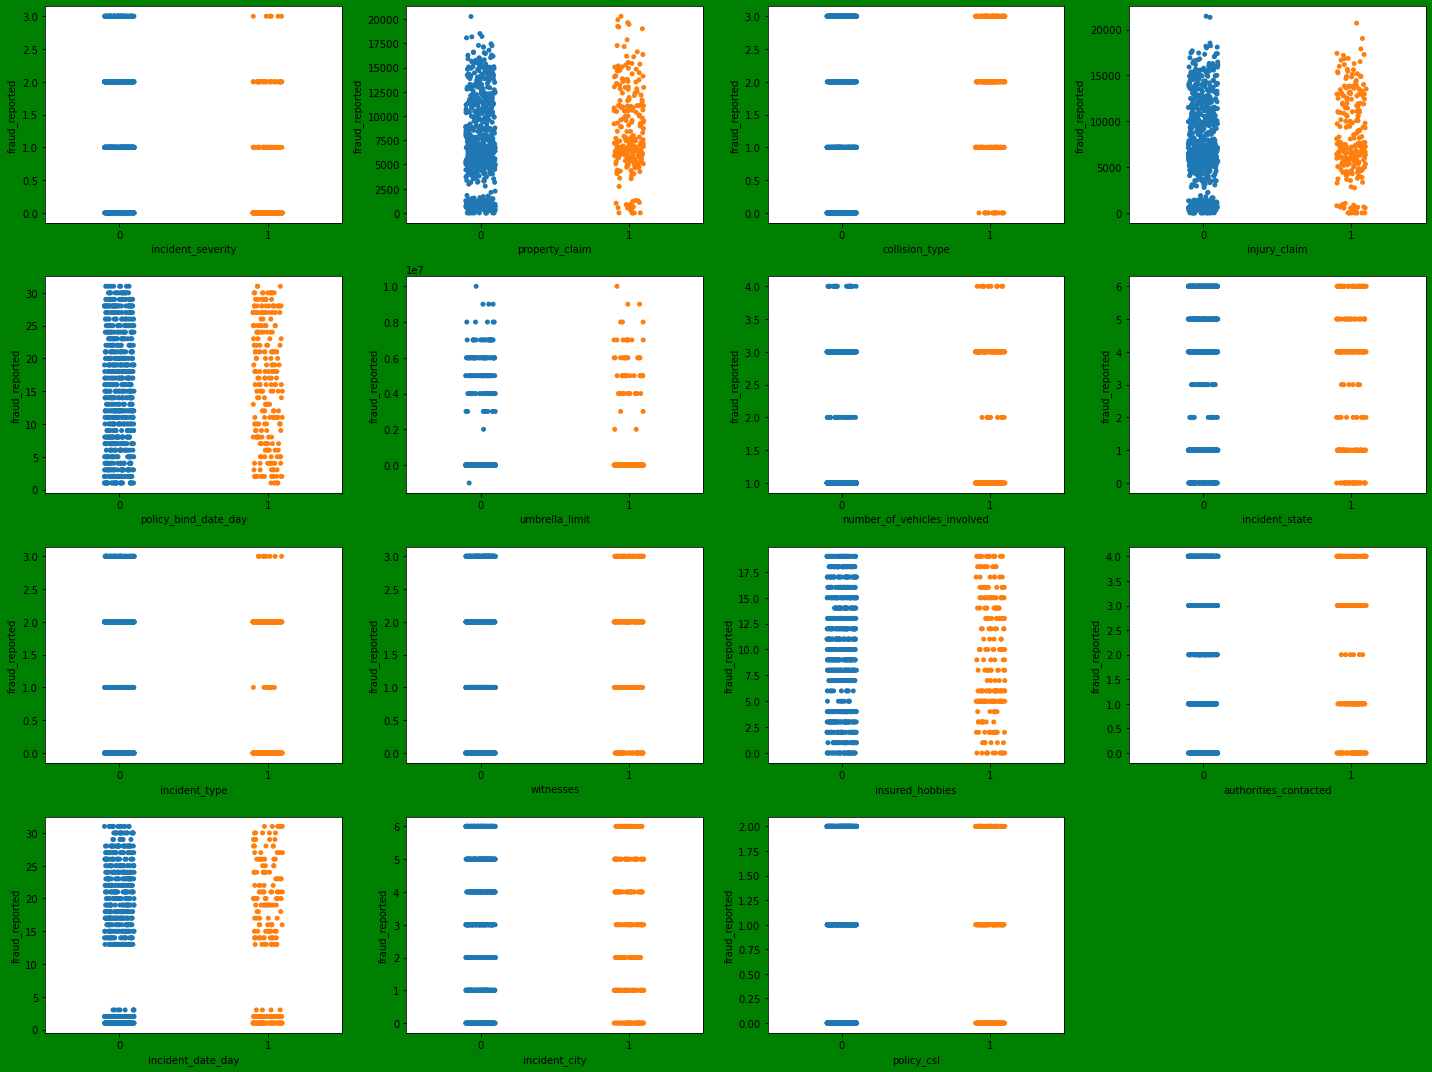

In [586]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('fraud_reported',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

The trend is not clear here, so lets plot the regplot for a better view of the trend in relationship between the features and the label.

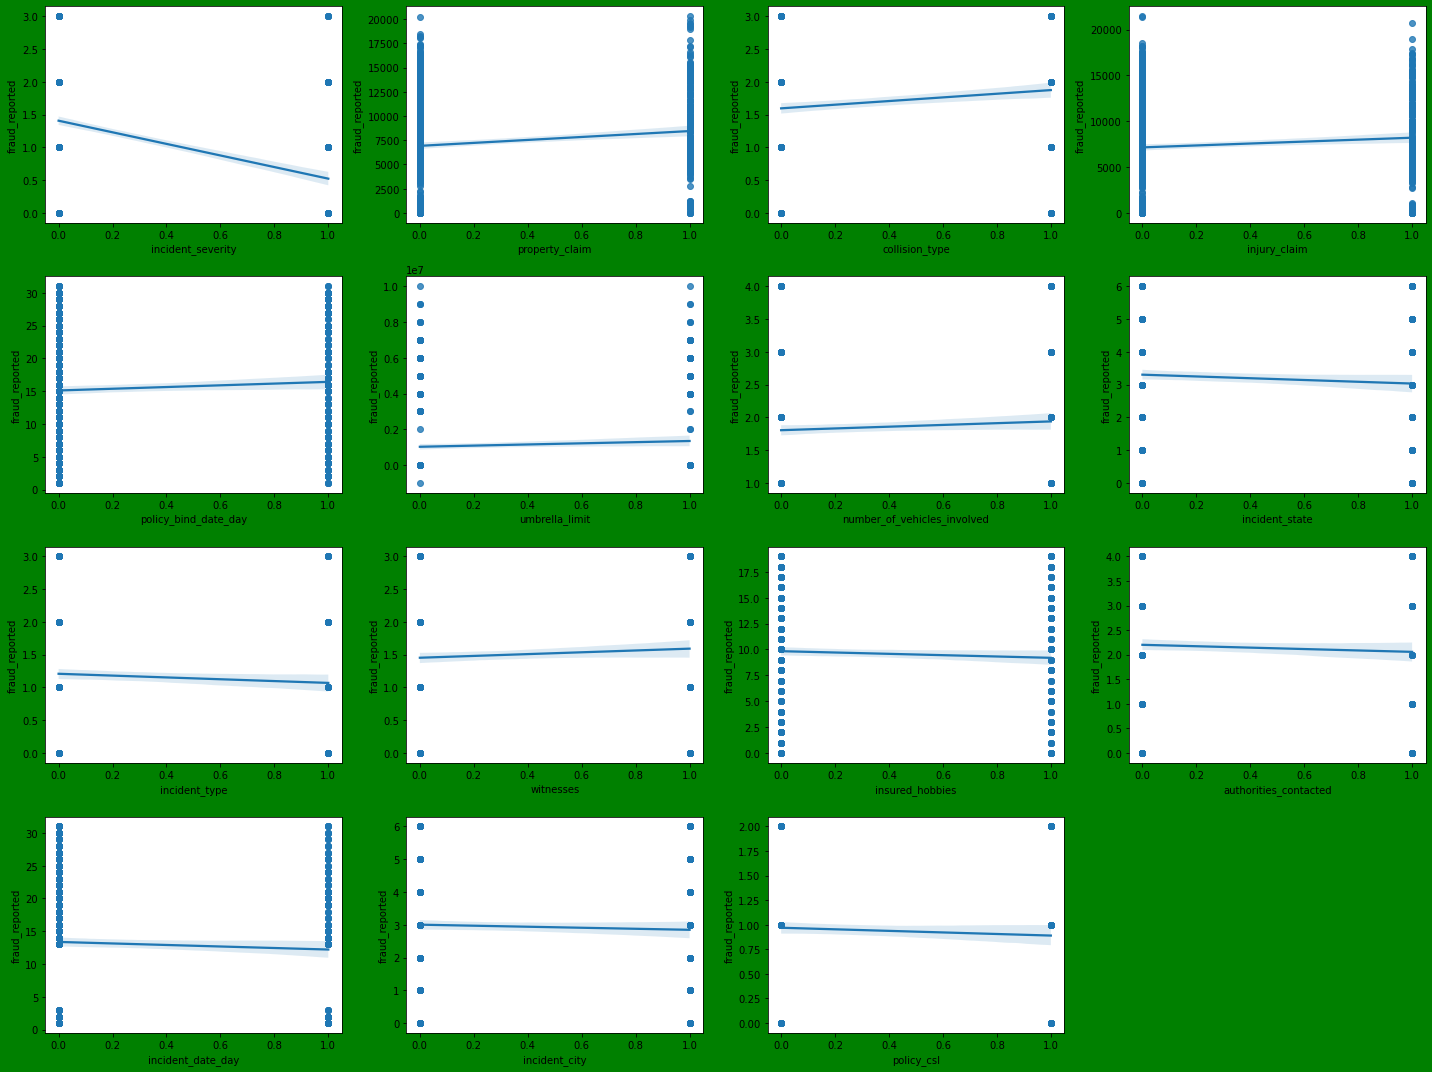

In [587]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.regplot(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('fraud_reported',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

From the regplots we have observedd that the trend is neither totally upward nor totally downward in most of the features.

In [592]:
#using standard scalar for scaling the model
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

In [593]:
x_scaled.shape[1]

15

Finding the variance inflation factor (VIF) for each scaled column to know if the multi-colinerity still exists in the dataset


In [594]:
#computing vif for all the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns

vif

VIF                     Features
0   1.178367            incident_severity
1   1.662496               property_claim
2   1.492853               collision_type
3   1.610825                 injury_claim
4   1.008709         policy_bind_date_day
5   1.012985               umbrella_limit
6   5.028773  number_of_vehicles_involved
7   1.020941               incident_state
8   5.014052                incident_type
9   1.021555                    witnesses
10  1.015177              insured_hobbies
11  1.051828        authorities_contacted
12  1.006335            incident_date_day
13  1.007838                incident_city
14  1.016274                   policy_csl

The vif scores for all the features is below 10. So no features show strong multicolinearity.

Now as the label has  catagorical data  so this is a Classification problem. We will be building some classification algorithms for this problem and we will find out the best machine learning model among them.

# Building classification models for predicting fraud_reported

In [595]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=700)
y_train.head()


336    0
771    0
743    1
791    1
106    1
Name: fraud_reported, dtype: int32

In [596]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [597]:
lr=LogisticRegression() 
knn=KNeighborsClassifier() 
dtc=DecisionTreeClassifier() 
rfc=RandomForestClassifier()   
svm=SVC()                 

In [601]:
models = [lr, knn, dtc, svm, rfc]
for m in models:
    print (m)
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    print (accuracy_score(y_test, y_pred))
    print (confusion_matrix(y_test, y_pred))
    print (classification_report(y_test, y_pred))

LogisticRegression()
0.7710843373493976
[[172   9]
 [ 48  20]]
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       181
           1       0.69      0.29      0.41        68

    accuracy                           0.77       249
   macro avg       0.74      0.62      0.64       249
weighted avg       0.76      0.77      0.74       249

KNeighborsClassifier()
0.714859437751004
[[169  12]
 [ 59   9]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.83       181
           1       0.43      0.13      0.20        68

    accuracy                           0.71       249
   macro avg       0.58      0.53      0.51       249
weighted avg       0.66      0.71      0.66       249

DecisionTreeClassifier()
0.7670682730923695
[[159  22]
 [ 36  32]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       181
           1       0.59      0.47      0.52

RandomForestClassifier model shows the best accuracy score among all the models.

In [602]:
# Cross validation scores for all models

for m in models:
    c_v= cross_val_score(m, x_scaled, y, cv = 10)
    print ('Cross Validation Score for ',m, ' is :', c_v.mean())
    print (' ')

Cross Validation Score for  LogisticRegression()  is : 0.7875151515151515
 
Cross Validation Score for  KNeighborsClassifier()  is : 0.7301313131313132
 
Cross Validation Score for  DecisionTreeClassifier()  is : 0.7905656565656566
 
Cross Validation Score for  SVC()  is : 0.7925050505050505
 
Cross Validation Score for  RandomForestClassifier()  is : 0.7996464646464647
 


RandomForestClassifier model has the best crossvalidation score among all the models.

now lets plot the ROC AUC curve to know about the best fitted model.

In [605]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

print(roc_auc_score(y_test,lr.predict(x_test)))
print(roc_auc_score(y_test,knn.predict(x_test)))
print(roc_auc_score(y_test,dtc.predict(x_test)))
print(roc_auc_score(y_test,rfc.predict(x_test)))
print(roc_auc_score(y_test,svm.predict(x_test)))

0.6221969450763731
0.533027299317517
0.6745206369840755
0.6414933376665585
0.5477738056548587


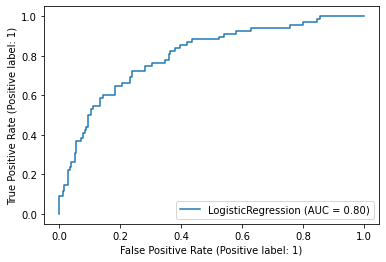

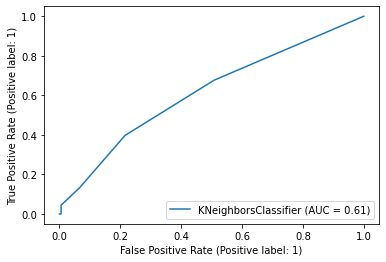

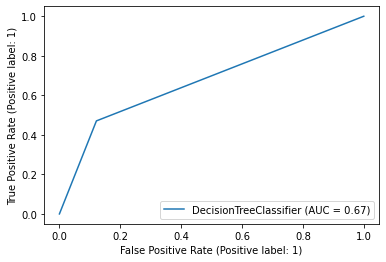

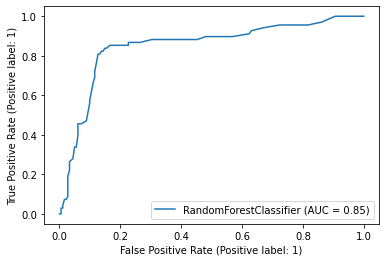

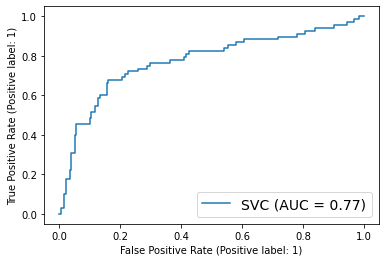

In [606]:
#plotting RocAuc curve
plot_roc_curve(lr,x_test,y_test)  
plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(dtc,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test)
plot_roc_curve(svm,x_test,y_test)
plt.legend(prop = {'size':14}, loc ='lower right')

RandomForestClassifier model gives the best AUC(area under the curve) value among all the models.

We have concluded that the RandomForestClassifier() model is the best model based on the accuracy,Cross validation and AUC scores among all the models. So now lets use RandomForestClassifier() for further analysis and lets check whether we can improve the accuracy of the model by using Hyperparameter tuning using GridSearchCV.

# Hyperparameter Tuning using GridSearchCV

In [607]:
#performing hyperparameter tuning for Random Forest Classifier method
from sklearn.model_selection import GridSearchCV
param_grid={'max_features':['auto', 'sqrt'],'min_samples_leaf':[1,2,4,6],'n_estimators':[20,40,60,80,100,150],'criterion' :['gini', 'entropy']}

In [608]:
gridsearch=GridSearchCV(estimator=rfc , param_grid=param_grid )

In [609]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [20, 40, 60, 80, 100, 150]})

In [610]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 80}

In [611]:
rfc=RandomForestClassifier(max_features='auto', min_samples_leaf=2,n_estimators=80,criterion='entropy')

In [612]:
rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', min_samples_leaf=2, n_estimators=80)

In [613]:
new_data.tail()

incident_severity  property_claim  collision_type  injury_claim  \
995                  1            8720               1         17440   
996                  0           18080               2         18080   
997                  1            7500               3          7500   
998                  0            5220               2          5220   
999                  1             920               0           460   

     policy_bind_date_day  umbrella_limit  number_of_vehicles_involved  \
995                    16               0                            1   
996                     1               0                            1   
997                    17         3000000                            3   
998                    18         5000000                            1   
999                    11               0                            1   

     incident_state  incident_type  witnesses  insured_hobbies  \
995               0              2          1               13   
996               4              2          3               17   
997               0              0          3                3   
998               1              2          1                0   
999               6              1          3               11   

     authorities_contacted  incident_date_day  incident_city  policy_csl  \
995                      1                 22              4           2   
996                      1                 24              3           0   
997                      4                 23              0           1   
998                      3                 26              0           2   
999                      4                 26              1           1   

     fraud_reported  
995               0  
996               0  
997               0  
998               0  
999               0

In [614]:
#prediction of Fraud_reported 
print(' Fraud reported- ', rfc.predict(scalar.transform([[1,8720,1,17440,16,0,1,0,2,1,13,1,22,4,2]])))

 Fraud reported-  [0]


In [615]:
y_pred=rfc.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1])

In [616]:
#printing the confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[170,  11],
       [ 38,  30]], dtype=int64)

In [617]:
#printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       181
           1       0.73      0.44      0.55        68

    accuracy                           0.80       249
   macro avg       0.77      0.69      0.71       249
weighted avg       0.79      0.80      0.79       249



The model accuracy has increased after using Hyperparameter tunning.

In [618]:
#plotting Auc roc curve
print(roc_auc_score(y_test,rfc.predict(x_test)))

0.690201494962626


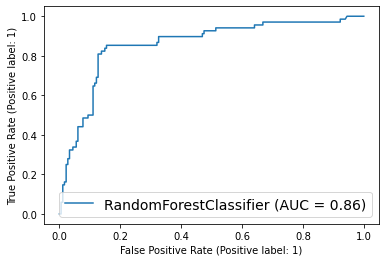

In [619]:
plot_roc_curve(rfc,x_test,y_test)
plt.legend(prop = {'size':14}, loc ='lower right')

Auc value has also increased after using hyperparameter tuning.

In [620]:
#cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(rfc,x_scaled,y,cv=10)

array([0.78      , 0.86      , 0.77      , 0.83838384, 0.76767677,
       0.72727273, 0.76767677, 0.84848485, 0.84848485, 0.76767677])

In [621]:
cross_val_score(RandomForestClassifier(),x_scaled,y,cv=10).mean()

0.8056565656565657

# Saving the model

In [626]:
#saving the machine learning model
import pickle
filename='finalized_model.pickle9'
pickle.dump(rfc,open('finalized_model.pickle9','wb'))